<a href="https://colab.research.google.com/github/nlepardo/sales_predictions/blob/project1-part3/Sales_Prediction_Project_1_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
filename = '/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#How many rows and columns?

In [3]:
#How many rows and columns?
df.shape

(8523, 12)

What are the dataypes of each variables?


In [4]:
#What are the datatypes of each variables?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Are there duplicates? If so, drop any duplicates.

In [5]:
#Are there duplicates? If so, drop any duplicates.

df.duplicated().sum()

0

#Identify missing values.

In [6]:
#Identify missing values.

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Decide on how to address the missing values and do it. (This requires your judgement, so explain your choice)

In [7]:
#List of Outlet Identifier
df.Outlet_Identifier.unique()


array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [8]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
#Outlet Identifier that has null Outlet Size
out_size = df['Outlet_Size'].isna()
null_size = df[out_size]
null_size.Outlet_Identifier.unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [10]:
#checking missing outlet size and its outlet location type
null_size.groupby(['Outlet_Identifier','Outlet_Size','Outlet_Location_Type'], dropna=False).count()

,,,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales
Outlet_Identifier,Outlet_Size,Outlet_Location_Type,,,,,,,,,
OUT010,NaN,Tier 3,555,555,555,555,555,555,555,555,555
OUT017,NaN,Tier 2,926,926,926,926,926,926,926,926,926
OUT045,NaN,Tier 2,929,929,929,929,929,929,929,929,929


In [11]:
#checking the correlation between Outlet Size and Item Outlet Sales
df.groupby(['Outlet_Size','Outlet_Type','Item_Outlet_Sales'], dropna=False).sum()


Item_Weight  Item_Visibility  \
Outlet_Size Outlet_Type       Item_Outlet_Sales                                 
High        Supermarket Type1 73.2380                 20.500         0.143164   
                              126.5020                 7.220         0.038289   
                              149.8050                 7.935         0.017142   
                              163.7868                19.250         0.101689   
                              169.7790                11.800         0.076657   
...                                                      ...              ...   
NaN         Supermarket Type1 8760.5964                8.050         0.078844   
                              8851.1452                9.895         0.048761   
                              8994.9580               16.750         0.081485   
                              9275.9256                5.695         0.065961   
                              9664.7528               12.600         0.074339   

                                                 Item_MRP  \
Outlet_Size Outlet_Type       Item_Outlet_Sales             
High        Supermarket Type1 73.2380             34.9190   
                              126.5020            64.7510   
                              149.8050            50.0350   
                              163.7868            54.6956   
                              169.7790            32.3558   
...                                                   ...   
NaN         Supermarket Type1 8760.5964          257.0646   
                              8851.1452          260.5278   
                              8994.9580          258.0988   
                              9275.9256          259.2646   
                              9664.7528          255.5356   

                                                 Outlet_Establishment_Year  
Outlet_Size Outlet_Type       Item_Outlet_Sales                             
High        Supermarket Type1 73.2380                                 1987  
                              126.5020                                1987  
                              149.8050                                1987  
                              163.7868                                1987  
                              169.7790                                1987  
...                                                                    ...  
NaN         Supermarket Type1 8760.5964                               2007  
                              8851.1452                               2002  
                              8994.9580                               2002  
                              9275.9256                               2007  
                              9664.7528                               2007  

[6630 rows x 4 columns]

In [12]:
#Since no correlation between Outlet Size and Outlet Sales, dropping Outlet Size column 

df = df.drop(columns='Outlet_Size')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [13]:
#Item Weight Column is not useful sp dropping

df = df.drop(columns='Item_Weight')
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


#Find and fix any inconsistent categories of data (ex: fix cat, Cat, and cats so that they are consistent)

In [14]:
df.nunique()

Item_Identifier              1559
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [15]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
#replace inconsistent data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

#For any numerical columns, obtain the summary statistics of each(min, max, mean)

In [17]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


# Project 1 - Part 3

### Histogram to view the distributions of various features in the dataset

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

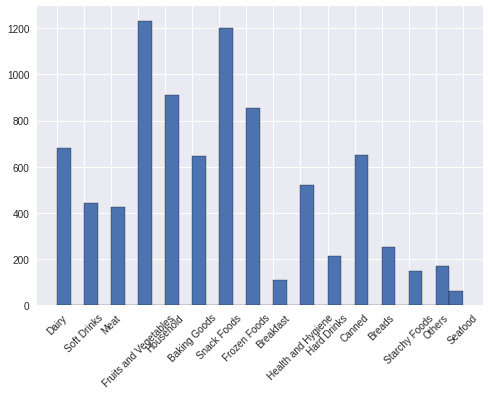

In [19]:
#Distribution of Item Type
plt.style.use('seaborn')
item_type = df.loc[:, 'Item_Type'] != ''
df.loc[item_type, 'Item_Type'].hist(bins=30, edgecolor='black')
plt.xticks(rotation=45)
#plt.ticklabel_format(useOffset=False, style='plain')

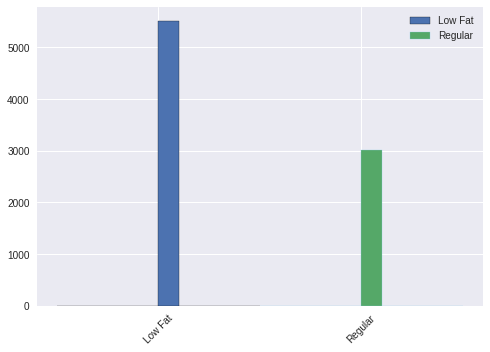

In [20]:
# Distribution of Item Fat Content
plt.style.use('seaborn')
low_fat_content = df.loc[:, 'Item_Fat_Content'] == 'Low Fat'
regular_content = df.loc[:, 'Item_Fat_Content'] == 'Regular'
df.loc[low_fat_content, 'Item_Fat_Content'].hist(bins=10, edgecolor='black')
df.loc[regular_content, 'Item_Fat_Content'].hist(bins=10, edgecolor='skyblue')
plt.xticks(rotation=45)
labels = ['Low Fat','Regular']
plt.legend(labels)

### Boxplot to view the statistical summaries of various features in the dataset

In [21]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [22]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


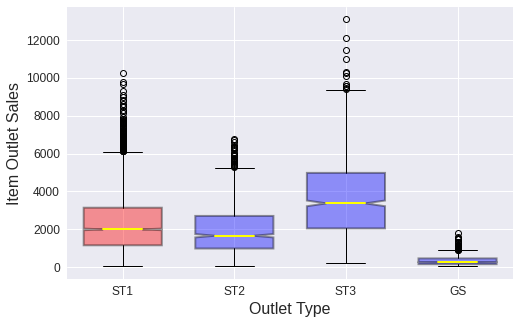

In [32]:
ST1 = df.loc[df['Outlet_Type']=='Supermarket Type1','Item_Outlet_Sales']
ST2 = df.loc[df['Outlet_Type']=='Supermarket Type2','Item_Outlet_Sales']
ST3 = df.loc[df['Outlet_Type']=='Supermarket Type3','Item_Outlet_Sales']
GS = df.loc[df['Outlet_Type']=='Grocery Store','Item_Outlet_Sales']
#benign = df.loc[df['diagnosis']=='B','area_mean']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([ST1,ST2,ST3,GS],
           notch = True,
           labels=['ST1', 'ST2', 'ST3', 'GS'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Outlet Type', fontsize = 16);
plt.ylabel('Item Outlet Sales', fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


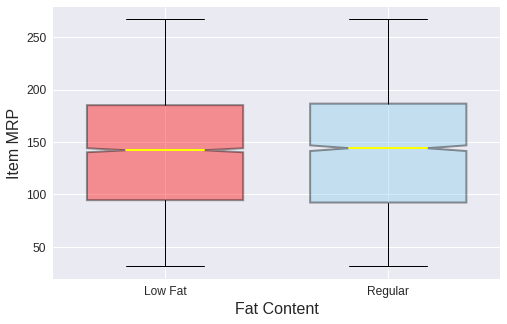

In [29]:
# PLotting Item Fat Content and Item MRP

LF_Content = df.loc[df['Item_Fat_Content']=='Low Fat','Item_MRP']
R_Content = df.loc[df['Item_Fat_Content']=='Regular','Item_MRP']


fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([LF_Content, R_Content],
           notch = True,
           labels=['Low Fat','Regular'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
boxplot2 = boxplots['boxes'][1]
boxplot2.set_facecolor('skyblue')
plt.xlabel('Fat Content', fontsize = 16);
plt.ylabel('Item MRP', fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

### Heatmap of the correlation beetween features

In [30]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


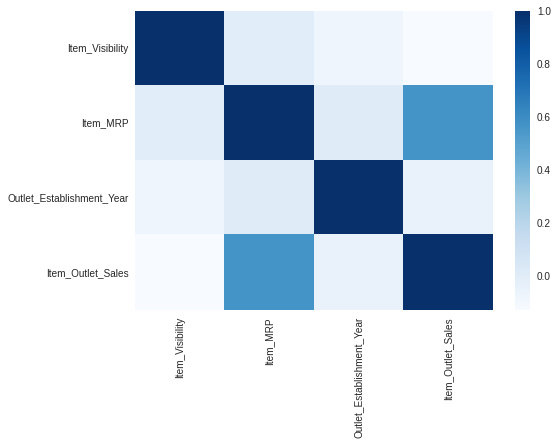

In [31]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues')